In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics

In [3]:
train = pd.read_csv('tokenized_train_data.csv')
test = pd.read_csv('tokenized_test_data.csv')
master = pd.concat([train, test])

In [4]:
train, test = train_test_split(master, test_size=0.25, random_state=42)

In [5]:
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True, max_features = 700)
# get X train 2d array of train features
X_train = vectorizer.fit_transform(train['tokenized_lyrics'].values).toarray()
vocab = vectorizer.get_feature_names()
# Train model
model = LogisticRegression(max_iter = 10000).fit(X_train, train['lr_valence'].values)

In [11]:
 # create vectorizer for test data
test_vectorizer = TfidfVectorizer(analyzer='word', lowercase=True, max_features = 700, vocabulary= vocab)
# get X test 2d array of train features
X_test = test_vectorizer.fit_transform(test['tokenized_lyrics'].values).toarray()

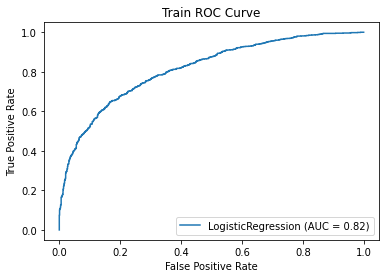

In [15]:
metrics.plot_roc_curve(model, X_train, train['lr_valence'].values)
plt.title('Train ROC Curve')
plt.savefig("auc_train_curve.png")

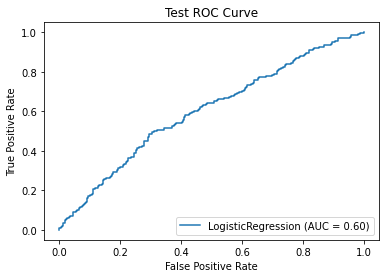

In [14]:
metrics.plot_roc_curve(model, X_test, test['lr_valence'].values)
plt.title('Test ROC Curve')
plt.savefig("auc_test_curve.png")

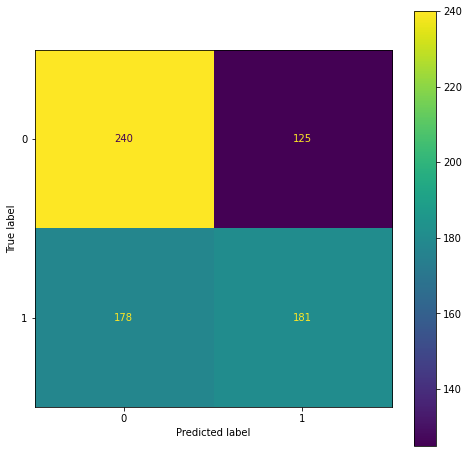

In [19]:
ig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(model, X_test, test['lr_valence'].values, ax=ax, values_format = '.5g')
plt.savefig("confusion_matrix.png")

<class 'pandas.core.frame.DataFrame'>
Words most negatively associated: 153          die
102    christmas
682         wish
69       breathe
325         know
361         lose
126        crack
251          god
527         shit
380      million
Name: Feature, dtype: object
Words most positively associated: 521       set
139     dance
214      fish
224      fool
614     throw
511    school
316       kid
239     funky
492      ride
204     fight
Name: Feature, dtype: object


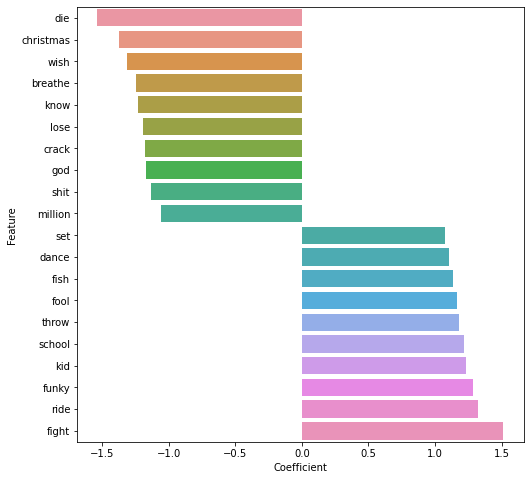

In [21]:
# graph features
model_coef = ((model.coef_).transpose())
df = pd.DataFrame(model_coef, columns=["Coefficient"])
feature = pd.DataFrame(vocab, columns = ["Feature"])
feature = pd.concat([feature, df], axis=1)
top_10_neg = feature.sort_values(["Coefficient"])["Feature"].head(10)
top_10_pos = feature.sort_values(["Coefficient"])["Feature"].tail(10)
df = pd.concat([feature.sort_values(["Coefficient"]).head(10), feature.sort_values(["Coefficient"]).tail(10)])
print(type(df))
print("Words most negatively associated:",top_10_neg)
print("Words most positively associated:",top_10_pos)
fig, ax = plt.subplots(figsize=(8, 8))
plot = sns.barplot(x = "Coefficient", y = "Feature", data=df, ax=ax)
plt.savefig('feature_analysis')

In [22]:
# Save the model that did the best in terms of testing
pickle.dump(model, open('model.sav', 'wb'))
vectorizer